# 1A.e - TD noté, 27 novembre 2012 (éléments de code pour le coloriage)

Coloriage d'une image, dessin d'une spirale avec *matplotlib* : éléments de code données avec l'énoncé.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## construction de la spirale

On utilise une représentation paramétrique de la spirale : [spirale](https://fr.wikipedia.org/wiki/Spirale).

In [3]:
import math


# cette fonction construit deux spirales imbriquées dans une matrice nb x nb
# le résultat est retourné sous forme de liste de listes
def construit_matrice(nb):
    mat = [[0 for x in range(0, nb)] for y in range(0, nb)]

    def pointij(nb, r, th, mat, c, phase):
        i, j = r * th * math.cos(th + phase), r * th * math.sin(th + phase)
        i, j = int(i * 100 / nb), int(j * 100 / nb)
        i, j = (i + nb) // 2, (j + nb) // 2
        if 0 <= i < nb and 0 <= j < nb:
            mat[i][j] = c
        return i, j

    r = 3.5
    t = 0
    for tinc in range(nb * 100000):
        t += 1.0 * nb / 100000
        th = t * math.pi * 2
        i, j = pointij(nb, r, th, mat, 1, 0)
        i, j = pointij(nb, r, th, mat, 1, math.pi)
        if i >= nb and j >= nb:
            break

    return mat


matrice = construit_matrice(100)

## dessin de la spirale

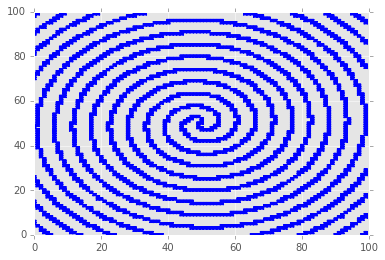

In [4]:
import matplotlib.pyplot as plt


def dessin_matrice(matrice):
    f, ax = plt.subplots()
    ax.set_ylim([0, len(matrice[0])])
    ax.set_xlim([0, len(matrice)])
    colors = {1: "blue", 2: "red"}
    for i in range(0, len(matrice)):
        for j in range(0, len(matrice[i])):
            if matrice[i][j] in colors:
                ax.plot(
                    [
                        i - 0.5,
                        i - 0.5,
                        i + 0.5,
                        i + 0.5,
                        i - 0.5,
                        i + 0.5,
                        i - 0.5,
                        i + 0.5,
                    ],
                    [
                        j - 0.5,
                        j + 0.5,
                        j + 0.5,
                        j - 0.5,
                        j - 0.5,
                        j + 0.5,
                        j + 0.5,
                        j - 0.5,
                    ],
                    colors[matrice[i][j]],
                )
    return ax


dessin_matrice(matrice)

## ajouter du rouge

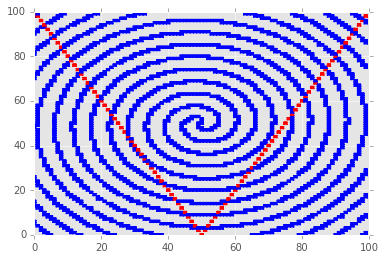

In [5]:
n = len(matrice)
for i in range(0, n):
    matrice[i][min(n - 1, abs(n - 2 * i))] = 2
dessin_matrice(matrice)